# Section 1: Introduction

Probabilistic Graphical Models (PGMs) are a robust approach to representing joint probability distributions on a set of random variables, enabling computationally efficient inferences. PGMs leverage independent conditions between random variables to create a graph structure that represents the relationships among them. By combining various parameters taken from the graph, we can calculate the joint probability distribution of these variables.

Bayesian Graph Models are a type of PGM that consists of a Directed Acyclic Graph (DAG) with a conditional probability associated with each random variable. These models represent causation between the random variables.

Pgmpy is a Python framework that enables working with these graph models. It includes several graph models and inference algorithms, and users can even create their own inference algorithms without delving into the details of the source code. Let us now proceed to the implementation part.

Note that you are expected to provide explanations of the functions' outputs.

# Section 2: Creating the Model (25 points)

In this section, you will implement this bayesian network using pgmpy library.

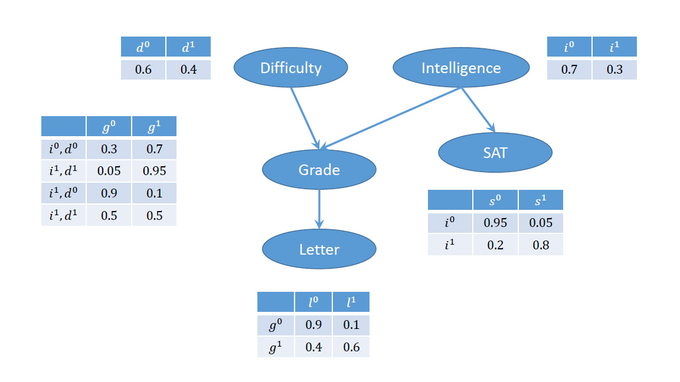

In [1]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.3 MB/s eta 0:00:00


In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling
from pgmpy.sampling import GibbsSampling
from pgmpy.inference import VariableElimination
from pgmpy.inference.EliminationOrder import WeightedMinFill

In [6]:
bn_model = BayesianNetwork([('Difficulty', 'Grade'), ('Intelligence', 'Grade'),
                          ('Intelligence', 'SAT'), ('Grade', 'Letter')])

In [7]:
cpd_difficulty = TabularCPD(variable='Difficulty', variable_card=2, values=[[0.6], [0.4]])
cpd_intelligence = TabularCPD(variable='Intelligence', variable_card=2, values=[[0.7], [0.3]])
cpd_sat = TabularCPD(variable='SAT', variable_card=2, values=[[0.95, 0.2], [0.05, 0.8]],
                     evidence=['Intelligence'], evidence_card=[2])
cpd_grade = TabularCPD(variable='Grade', variable_card=2,
                       values=[[0.3, 0.9, 0.05, 0.5], [0.7, 0.1, 0.95, 0.5]],
                       evidence=['Difficulty', 'Intelligence'], evidence_card=[2, 2])
cpd_letter = TabularCPD(variable='Letter', variable_card=2, values=[[0.9, 0.4], [0.1, 0.6]],
                        evidence=['Grade'], evidence_card=[2])

bn_model.add_cpds(cpd_difficulty, cpd_intelligence, cpd_sat, cpd_grade, cpd_letter)

# Section 3: Operations (15 points)

Use the appropriate functions to answer the questions

1. What are the active trail nodes for *Intelligence*?

In [8]:
active_trails_observed = bn_model.active_trail_nodes('Intelligence', observed='Grade')
print(active_trails_observed)

{'Intelligence': {'SAT', 'Difficulty', 'Intelligence'}}


2. Are *Difficulty* and *Intelligence* D-connected? What if we have *Letter* as evidence?

In [13]:
# Are Difficulty and Intelligence d-connected?
d_connected = bn_model.is_dconnected('Difficulty', 'Intelligence')
print(d_connected)

# Are Difficulty and Intelligence d-connected given Letter?
d_connected_given_evidence = bn_model.is_dconnected('Difficulty', 'Intelligence', observed=['Letter'])
print(d_connected_given_evidence)

False
True


3. Print all independencies.

In [14]:
# Get all independencies in the Bayesian Network
independencies = bn_model.get_independencies()
print(independencies)

(SAT ⟂ Difficulty)
(SAT ⟂ Letter | Grade)
(SAT ⟂ Letter, Difficulty, Grade | Intelligence)
(SAT ⟂ Difficulty, Grade | Letter, Intelligence)
(SAT ⟂ Letter | Difficulty, Grade)
(SAT ⟂ Letter, Difficulty | Intelligence, Grade)
(SAT ⟂ Letter, Grade | Difficulty, Intelligence)
(SAT ⟂ Difficulty | Letter, Intelligence, Grade)
(SAT ⟂ Grade | Letter, Difficulty, Intelligence)
(SAT ⟂ Letter | Difficulty, Grade, Intelligence)
(Grade ⟂ SAT | Intelligence)
(Grade ⟂ SAT | Letter, Intelligence)
(Grade ⟂ SAT | Difficulty, Intelligence)
(Grade ⟂ SAT | Letter, Difficulty, Intelligence)
(Letter ⟂ SAT, Difficulty, Intelligence | Grade)
(Letter ⟂ SAT | Intelligence)
(Letter ⟂ Difficulty, Intelligence | SAT, Grade)
(Letter ⟂ SAT, Intelligence | Difficulty, Grade)
(Letter ⟂ SAT, Difficulty | Intelligence, Grade)
(Letter ⟂ SAT | Difficulty, Intelligence)
(Letter ⟂ Intelligence | SAT, Difficulty, Grade)
(Letter ⟂ Difficulty | SAT, Intelligence, Grade)
(Letter ⟂ SAT | Difficulty, Grade, Intelligence)
(Difficul

# Section 4: Variable Elimination (25 points)

Get the induced graph formed by running Variable Elimination on the network. Print the induced graph and the elimination order.

  0%|          | 0/5 [00:00<?, ?it/s]

Induced Graph: [('Difficulty', 'Grade'), ('Difficulty', 'Intelligence'), ('Grade', 'Letter'), ('Grade', 'Intelligence'), ('SAT', 'Intelligence')] by elimination order: ['Letter', 'SAT', 'Intelligence', 'Difficulty', 'Grade']


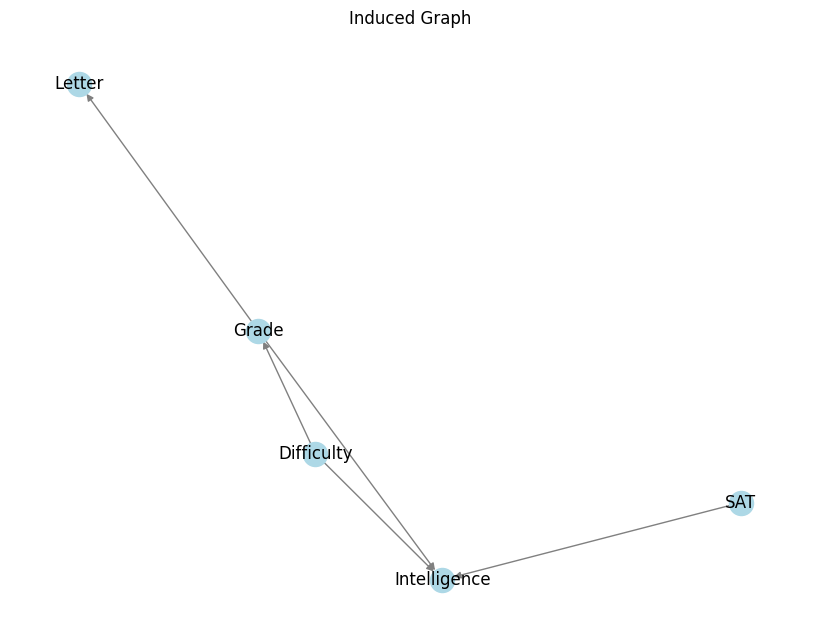

In [19]:
from pgmpy.inference import VariableElimination
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
from pgmpy.inference.EliminationOrder import WeightedMinFill
import matplotlib.pyplot as plt
import networkx as nx

# Create the CPDs
cpd_d = TabularCPD(variable='Difficulty', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='Intelligence', variable_card=2, values=[[0.7], [0.3]])

# Create the CPDs
cpd_g = TabularCPD(variable='Grade', variable_card=2, values=[[0.3, 0.9, 0.05, 0.5], [0.7, 0.1, 0.95, 0.5]],
                   evidence=['Difficulty', 'Intelligence'], evidence_card=[2, 2])

cpd_s = TabularCPD(variable='SAT', variable_card=2,
                   values=[[0.95, 0.2], [0.05, 0.8]],
                   evidence=['Intelligence'], evidence_card=[2])

cpd_l = TabularCPD(variable='Letter', variable_card=2,
                   values=[[0.9, 0.4], [0.1, 0.6]],
                   evidence=['Grade'], evidence_card=[2])

# Add the CPDs to the model
model.add_cpds(cpd_d, cpd_i, cpd_s, cpd_g, cpd_l)

ve = VariableElimination(model)

# Run Variable Elimination on the network with no evidence
elimination_order = WeightedMinFill(model).get_elimination_order()

# Get the induced graph after elimination
induced_graph = ve.induced_graph(elimination_order)

print(f"Induced Graph: {induced_graph.edges()} by elimination order: {elimination_order}")

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(induced_graph.edges())

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Induced Graph")
plt.show()

# Section 5: Sampling (35 points)

Try forward sampling on your model.

In [20]:
sampler = BayesianModelSampling(model)
samples = sampler.forward_sample(size=10)
print(samples)

  0%|          | 0/5 [00:00<?, ?it/s]

   Difficulty  Grade  Intelligence  SAT  Letter
0           1      1             0    0       1
1           0      0             1    1       0
2           0      0             1    0       0
3           0      1             0    0       0
4           1      1             0    0       0
5           1      1             0    0       1
6           0      1             0    0       1
7           0      1             0    0       0
8           0      0             1    1       0
9           0      0             1    1       0


Try likelihood weighting sampling on your model.

In [21]:
sampler = BayesianModelSampling(model)
evidence = [State('Grade', 0)]
samples = sampler.likelihood_weighted_sample(evidence = evidence, size=10)
print(samples)

  0%|          | 0/5 [00:00<?, ?it/s]

   Difficulty  Grade  Intelligence  SAT  Letter  _weight
0           1      0             1    1       0     0.50
1           0      0             1    1       0     0.90
2           1      0             0    0       0     0.05
3           0      0             0    0       0     0.30
4           0      0             0    0       0     0.30
5           0      0             0    0       0     0.30
6           0      0             0    0       1     0.30
7           1      0             0    0       0     0.05
8           0      0             0    0       0     0.30
9           0      0             0    0       0     0.30


Try rejection sampling on your model.

In [22]:
sampler = BayesianModelSampling(model)
evidence = [State('Grade', 0)]
samples = sampler.rejection_sample(evidence = evidence, size=10)
print(samples)

  0%|          | 0/10 [00:00<?, ?it/s]

   Difficulty  Grade  Intelligence  SAT  Letter
0           0      0             1    1       1
1           0      0             0    0       0
2           1      0             0    0       0
3           1      0             1    0       0
4           0      0             0    0       1
5           0      0             1    1       0
6           0      0             0    0       0
7           0      0             0    0       0
8           0      0             1    1       0
9           0      0             1    1       0


And finally, try Gibbs sampling.

In [23]:
gibbs_chain = GibbsSampling(model)
gibbs_chain.sample(size=10)

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(


,Difficulty,Grade,Intelligence,SAT,Letter
0,1,0,1,1,1
1,0,0,1,1,0
2,1,0,1,1,0
3,0,0,1,1,1
4,0,0,1,1,0
5,0,0,1,1,0
6,0,0,1,1,0
7,0,0,1,0,0
8,0,0,0,0,1
9,0,1,0,0,1


Provide a detailed explanation of the results and consider which approach would be most suitable for your model.

Gibbs sampling is a powerful Markov chain Monte Carlo (MCMC) method that is particularly advantageous when the conditional distributions of each variable in a model are relatively simple, especially when they follow a conjugate prior distribution. In such cases, the Gibbs sampler can efficiently sample from these conditional distributions, resulting in faster convergence and improved mixing of the Markov chain.

Conjugate prior distributions play a crucial role in Gibbs sampling. When the prior distribution of a variable is conjugate to the likelihood function, the posterior distribution can be conveniently computed in a closed form. This property allows for straightforward updates of the parameters by sampling from the conditional distributions.

The Gibbs sampler iteratively updates each variable in the model by sampling from its conditional distribution, while holding all other variables fixed. By repeating this process, the Markov chain converges to the target posterior distribution.

When the conditional distributions are simple, the Gibbs sampler performs remarkably well. Sampling from these distributions becomes straightforward and computationally efficient. As a result, the Gibbs sampler exhibits faster convergence, meaning it requires fewer iterations to reach a satisfactory approximation of the target distribution. Moreover, the sampler demonstrates better mixing, implying that the samples generated from the Markov chain are less correlated, leading to more accurate and representative estimates of the posterior distribution.

By leveraging the simplicity of the conditional distributions, Gibbs sampling avoids the need for complicated and computationally intensive computations. This makes it an attractive choice in situations where more advanced MCMC methods may be challenging to implement or inefficient to converge. Additionally, the use of conjugate priors facilitates the sampling process and enhances the performance of the Gibbs sampler.

In summary, Gibbs sampling shines when the conditional distributions of variables follow conjugate prior distributions or are relatively simple. The ease of sampling from these distributions allows for faster convergence and better mixing of the Markov chain. This makes Gibbs sampling an effective and efficient tool for approximating posterior distributions in Bayesian inference, especially in scenarios where the conditional distributions have desirable properties that align with the Gibbs sampling algorithm.